# Modelo ML - Proyecto Júpiter - Inés

In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from PIL import Image

from sklearn.preprocessing import LabelEncoder

## 1. Resumen de este notebook

Estos serían los pasos que se han llevado a cabo en este notebook para hacer el algoritmo de Machine Learning:

### Definición del problema y objetivos

Pontia World quiere automatizar la tarea de detección de emociones. Es un problema de clasificación, ya que las etiquetas de las emociones están predeterminadas: angry, disgust, fear, happy, neutral, sad y surprise.

Las resticciones que tiene nuestro modelo son:
- La memoria: las imágenes individualmente no ocupan mucho, pero su conjunto es muy grande y por tanto podría generar problemas de memoria.
- Velocidad: al tener tantas imágenes, vamos a poder tener un problema de velocidad.

Usaremos el aprendizaje supervisado, ya que es un problema de clasificación.

### Selección de datos

Usaremos la selección de imágenes proporcionadas específicamente para Pontia World, ya divididas en train y test.

### Seleción del algoritmo

Probaremos a usar 2 tipos de algoritmos de ML:
- K-NN: puede ser muy útil para clasificar emociones ya que no tenemos un problema binario. También porque muchas emociones pueden ser difícil diferenciarlas y en este caso podemos etiqutarlas según sus k vecinos más cercanos.
- Random Forest: árbol de decisión que nos va a ayudar a elegir el mejor punto de corte sobre un subconjunto aleatorio de características, bueno si las imágenes no están muy claras y tienen ruido.

### Evaluación del modelo

Vamos a usar diferentes técnicas para evaluar el modelo:
- Mean Squared error
- Accuracy
- Recall
- F1- score, ya que los datos están desbalanceados
- Precisión
- Matriz de confusión

## 2. Clasificación de emociones con Machine Learning

### 2.1. Carga y preparación de los datos

Para la carga y preparación de datos, vamos a guardar las imágenes de train y test, respectivamente, en una variable con su ruta. Además, crearemos una lista con las emociones que hay que clasificar.

In [2]:
test_path = Path('./archive/test/')
train_path = Path('./archive/train/')
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

A continuación, vamos a crear una función que tiene como objetivo:
- Recorrer todas las imágenes dentro de sus carpetas (para ello usamos la librería path).
- Determinar el formato de la imagen (determinado en 48x48), modificarlo a escala de grises, ponerlo en vectores de una dimensión.
- Convertirlo en un array de numpy.
- Guardar las imágenes dentro de X_train, y_train, X_test, y_test.

In [3]:
def load_data(folder_path, emotions, img_size=(48, 48)):
    X, y = [], []
    for emotion in emotions:
        emotion_folder = folder_path / emotion
        for img_path in emotion_folder.glob("*"): #Recorre las imágenes de las subcarpetas (happy, angry...)
            try:
                img = Image.open(img_path).convert("L")     # Escala de grises
                img = img.resize(img_size)                  # Redimensionar
                features = np.array(img).flatten()          # Aplanar imagen a vector 1D numérico y lineal
                X.append(features)
                y.append(emotion)
            except:
                print(f"Error cargando imagen: {img_path}")
    return np.array(X), np.array(y)

X_train, y_train = load_data(train_path, emotions)
X_test, y_test = load_data(test_path, emotions)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28709, 2304)
(28709,)
(7178, 2304)
(7178,)


Vamos a codificar también la lista de emociones a un valor numérico:

In [5]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

for idx, label in enumerate(le.classes_):
    print(f"{idx} → {label}")

0 → angry
1 → disgust
2 → fear
3 → happy
4 → neutral
5 → sad
6 → surprise


### 2.2. Normalización de los datos

Para normalizar los datos, vamos a hacer una normalización al rango [0,1]. Para ello, dividimos las imágenes entre 255, convirtiendo cada valor de píxel de 0–255 a un rango [0, 1].

In [6]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

Vamos a hacer una comparativa de la imagen normalizada vs la cruda sin normalizar:

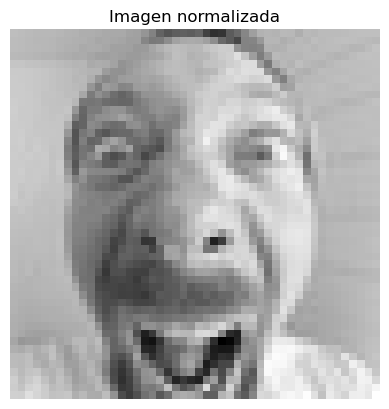

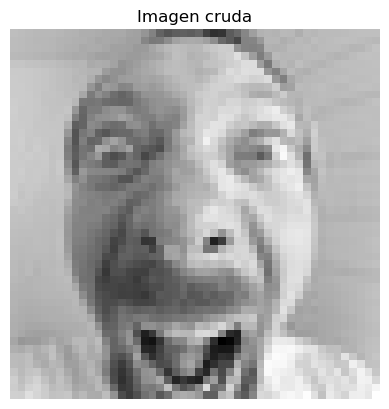

In [7]:
# Elegimos la primera imagen
idx = 0

# Recuperar imagen normalizada y volverla a poner en 48x48
img_normalizada = X_train_norm[idx].reshape(48, 48)
img_cruda = X_train[idx].reshape(48, 48)

# Mostrar imagen normalizada
plt.imshow(img_normalizada, cmap='gray')
plt.title(f"Imagen normalizada")
plt.axis('off')
plt.show()

# Mostrar imagen cruda
plt.imshow(img_cruda, cmap='gray')
plt.title(f"Imagen cruda")
plt.axis('off')
plt.show()

La diferencia entre la imagen normalizada y la curda no es notable al ojo humano.

## 3. Creación del modelo y evaluación

### 3.1. K-NN

Vamos a comprobar el mejor número de vecinos que podríamos tener iterando hasta 10 vecinos.

/var/folders/hk/bdt71gxn20vcpkkjx_flg9h40000gn/T/ipykernel_11510/2614127923.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accs = pd.concat([accs, pd.DataFrame([{"Neighbors":n_neighbors, "Training Accuracy":acc_tr, "Test Accuracy":acc_test}])], ignore_index=True)


For K = 1, train accuracy is 99.81% and test accuracy is 40.29%
For K = 2, train accuracy is 71.47% and test accuracy is 34.48%
For K = 3, train accuracy is 63.83% and test accuracy is 33.77%
For K = 4, train accuracy is 59.33% and test accuracy is 33.66%
For K = 5, train accuracy is 55.62% and test accuracy is 33.44%
For K = 6, train accuracy is 52.70% and test accuracy is 32.46%
For K = 7, train accuracy is 50.60% and test accuracy is 32.39%
For K = 8, train accuracy is 49.02% and test accuracy is 32.01%
For K = 9, train accuracy is 47.58% and test accuracy is 32.36%
For K = 10, train accuracy is 46.56% and test accuracy is 32.22%


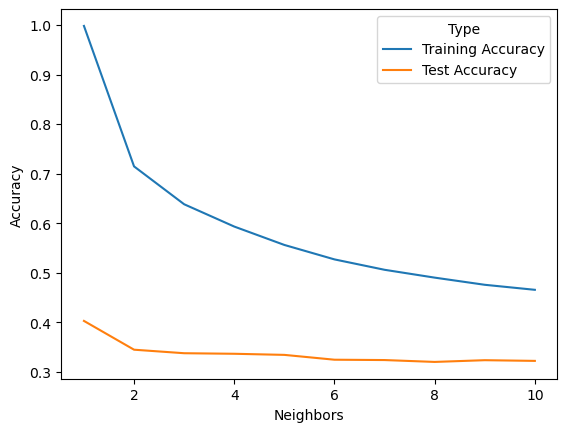

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, precision_score

K_max=10
rang_K = np.arange(1, K_max+1)
accs = pd.DataFrame(columns=["Neighbors","Training Accuracy", "Test Accuracy"])

# Iteremos sobre diferentes valores para vecinos
for n_neighbors in rang_K:
    # Crear el modelo y entrenarlo
    reg = KNeighborsClassifier(n_neighbors).fit(X_train, y_train)
    # Obtener la precision para el conjunto de datos de entrenamiento y testeo
    acc_tr = reg.score(X_train, y_train)
    acc_test = reg.score(X_test, y_test)
    
    # Guardamos la precision en un DataFrame para su posterior impresion
    accs = pd.concat([accs, pd.DataFrame([{"Neighbors":n_neighbors, "Training Accuracy":acc_tr, "Test Accuracy":acc_test}])], ignore_index=True)

    print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
          % (n_neighbors, 100*acc_tr, 100*acc_test))
    
# Mostremos la evolución de la precision
melted_accs = accs.melt('Neighbors', var_name="Type", value_name="Accuracy")
g = sns.lineplot(x="Neighbors", y="Accuracy", hue='Type', data=melted_accs)

Aunque sería muy oporturno elegir k=1, no sería muy representativo con la gran cantidad de datos que tenemos. Por ello, vamos a quedarnos con k=4.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, precision_score

# Definir el modelo de clasificacion KNN
neigh = KNeighborsClassifier(n_neighbors=4)

#Entrenar el modelo
neigh.fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = neigh.predict(X_test)

# Métricas
MSE_tst = mean_squared_error(y_test, y_est)
accuracy = neigh.score(X_test, y_test)
recall = recall_score(y_test, y_est, average='macro')
f1 = f1_score(y_test, y_est, average='macro')
precision = precision_score(y_test, y_est, average='macro')

# Imprimimos
print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))
print('Recall: ' + str(recall))
print('F1-score: ' + str(f1))
print('Precision: ' + str(precision))

MSE : 5.247979938701588
Accuracy: 0.3365840066870995
Recall: 0.3428516450336128
F1-score: 0.3323285259254298
Precision: 0.3389100828292003


In [10]:
from sklearn.metrics import classification_report

print("\nReporte K-NN:\n")
print(classification_report(y_test, y_est, target_names=le.classes_))


Reporte K-NN:

              precision    recall  f1-score   support

       angry       0.24      0.32      0.27       958
     disgust       0.25      0.41      0.31       111
        fear       0.30      0.30      0.30      1024
       happy       0.41      0.43      0.42      1774
     neutral       0.28      0.35      0.31      1233
         sad       0.33      0.19      0.24      1247
    surprise       0.57      0.40      0.47       831

    accuracy                           0.34      7178
   macro avg       0.34      0.34      0.33      7178
weighted avg       0.35      0.34      0.34      7178



#### Matriz de confusión

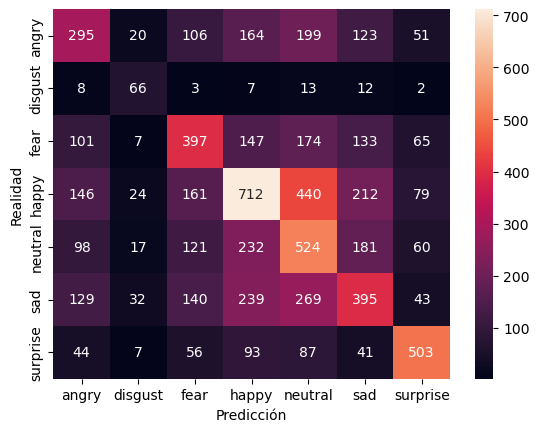

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_est)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

#### Validación cruzada

Utilizamos un GridSearchCV para hacer validación cruzada y ver cuál es el k más óptimo por otra vía. En este caso sale k =1, entonces crearemos el modelo de esta manera a ver qué resultados tiene.

In [12]:
from sklearn.model_selection import GridSearchCV

k_max = 4
rang_K = np.arange(1, k_max + 1)
tuned_parameters = [{'n_neighbors': rang_K}]
nfold = 3

# Definir el modelo de clasificación kNN con validación cruzada y entrenarlo
neigh_CV = GridSearchCV(
    KNeighborsClassifier(), 
    tuned_parameters, 
    cv=nfold, 
    return_train_score=True,
    verbose=1
)
neigh_CV.fit(X_train, y_train)

# Obtener las predicciones para el conjunto de test
y_est = neigh_CV.predict(X_test)

# Métricas
MSE_tst = mean_squared_error(y_test, y_est)
accuracy = neigh_CV.score(X_test, y_test)
recall = recall_score(y_test, y_est, average='macro')
f1 = f1_score(y_test, y_est, average='macro')
precision = precision_score(y_test, y_est, average='macro')

# Mejor valor de k
K_CV = neigh_CV.best_params_['n_neighbors']

print('MSE :', MSE_tst)
print('Accuracy:', accuracy)
print('Recall: ' + str(recall))
print('F1-score: ' + str(f1))
print('Precision: ' + str(precision))
print('Selected value of k:', K_CV)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
MSE : 4.246029534689328
Accuracy: 0.4028977431039287
Recall: 0.4340872500583258
F1-score: 0.4177055093698132
Precision: 0.4120823234948078
Selected value of k: 1


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, precision_score

# Definir el modelo de clasificacion KNN
neigh = KNeighborsClassifier(n_neighbors=1)

#Entrenar el modelo
neigh.fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
y_est = neigh.predict(X_test)

# Métricas
MSE_tst = mean_squared_error(y_test, y_est)
accuracy = neigh.score(X_test, y_test)
recall = recall_score(y_test, y_est, average='macro')
f1 = f1_score(y_test, y_est, average='macro')
precision = precision_score(y_test, y_est, average='macro')

# Imprimimos
print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))
print('Recall: ' + str(recall))
print('F1-score: ' + str(f1))
print('Precision: ' + str(precision))

MSE : 4.246029534689328
Accuracy: 0.4028977431039287
Recall: 0.4340872500583258
F1-score: 0.4177055093698132
Precision: 0.4120823234948078


In [17]:
from sklearn.metrics import classification_report

print("\nReporte K-NN:\n")
print(classification_report(y_test, y_est, target_names=le.classes_))


Reporte K-NN:

              precision    recall  f1-score   support

       angry       0.36      0.31      0.33       958
     disgust       0.38      0.59      0.46       111
        fear       0.40      0.39      0.40      1024
       happy       0.45      0.40      0.42      1774
     neutral       0.31      0.42      0.36      1233
         sad       0.36      0.32      0.34      1247
    surprise       0.63      0.61      0.62       831

    accuracy                           0.40      7178
   macro avg       0.41      0.43      0.42      7178
weighted avg       0.41      0.40      0.40      7178



#### Matriz de confusión

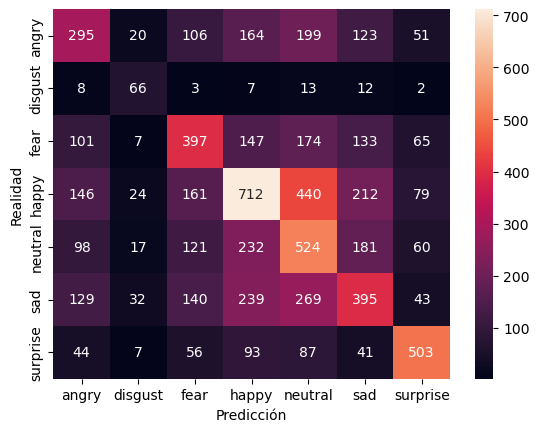

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_est)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Vemos que con K=1 tenemos mejores métricas, pero si nos fijamos en la matriz de confusión, los resultados por emoción son muy parecidos que con k=4. Podríamos decir que K-NN no ha sido un buen ejemplo de modelo para este caso concreto de clasificación de imágenes.

### 3.2. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, precision_score

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') #Ponemos el peso para balancear las clases.

#Entrenar
rf.fit(X_train, y_train)

#Predicción
y_est = rf.predict(X_test)

# Métricas
MSE_tst = mean_squared_error(y_test, y_est)
accuracy = rf.score(X_test, y_test)
recall = recall_score(y_test, y_est, average='macro')
f1 = f1_score(y_test, y_est, average='macro')
precision = precision_score(y_test, y_est, average='macro')

# Imprimimos
print('MSE : ' + str(MSE_tst))
print('Accuracy: ' + str(accuracy))
print('Recall: ' + str(recall))
print('F1-score: ' + str(f1))
print('Precision: ' + str(precision))

MSE : 3.467539704653107
Accuracy: 0.4502646976873781
Recall: 0.40402184359512044
F1-score: 0.4310549753549192
Precision: 0.5603707674937424


In [22]:
from sklearn.metrics import classification_report

print("\nReporte Random Forest:\n")
print(classification_report(y_test, y_est, target_names=le.classes_))


Reporte Random Forest:

              precision    recall  f1-score   support

       angry       0.47      0.21      0.29       958
     disgust       1.00      0.30      0.46       111
        fear       0.52      0.27      0.36      1024
       happy       0.40      0.79      0.53      1774
     neutral       0.43      0.34      0.38      1233
         sad       0.40      0.32      0.35      1247
    surprise       0.70      0.60      0.65       831

    accuracy                           0.45      7178
   macro avg       0.56      0.40      0.43      7178
weighted avg       0.48      0.45      0.43      7178



#### Matriz de confusión

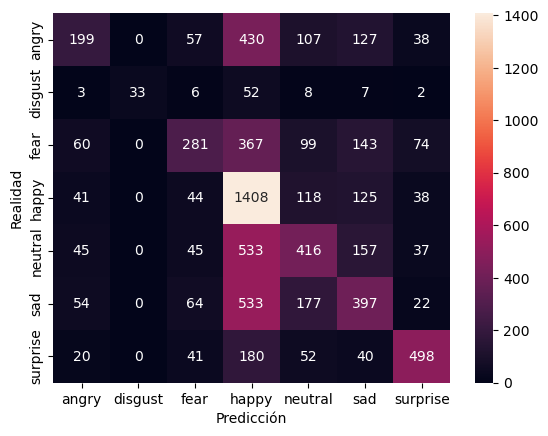

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_est)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Vemos que este resultado es mejor que el KNN. Sin embargo, sigue teniendo resultado bajos para la predicción que esperamos.

## 4. Conclusiones

La mejor opción de ambas sería un Random Forest ya que:
- Tiene un mejor accuracy en general.
- Hay mejor recall en todas, especialmente en la clase happy, que es la más representada.
- Mejores resultados de F1 en general, especialmente en Happy y Surprise:
| Clase    | F1 KNN | F1 RF | Gana   |
| -------- | ------ | ----- | ------ |
| Angry    | 0.33   | 0.29  | KNN    |
| Disgust  | 0.46   | 0.46  | Igual  |
| Fear     | 0.40   | 0.36  | KNN    |
| Happy    | 0.42   | 0.53  | **RF** |
| Surprise | 0.62   | 0.65  | **RF** |
  
- Más robusto al riudo que el KNN, por lo que podríamos considerarlo un modelo mejor para este caso.

Sin embargo, diremos que ninguno de los dos modelos es sólido, ya que tienen menos del 50% de accuracy.